## **Reading and understanding our data**

In [2]:
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt

%matplotlib inline

In [3]:
housing = pd.read_csv("Ames_Housing_Data1.tsv", sep='\t')
print(housing.shape)
housing.head(10)

(2931, 82)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
6,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
7,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
8,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
9,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2931 non-null   int64  
 1   PID              2931 non-null   int64  
 2   MS SubClass      2931 non-null   int64  
 3   MS Zoning        2931 non-null   object 
 4   Lot Frontage     2441 non-null   float64
 5   Lot Area         2931 non-null   int64  
 6   Street           2931 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2931 non-null   object 
 9   Land Contour     2931 non-null   object 
 10  Utilities        2931 non-null   object 
 11  Lot Config       2931 non-null   object 
 12  Land Slope       2931 non-null   object 
 13  Neighborhood     2931 non-null   object 
 14  Condition 1      2931 non-null   object 
 15  Condition 2      2931 non-null   object 
 16  Bldg Type        2931 non-null   object 
 17  House Style   

In [5]:
housing["SalePrice"].describe()

count      2931.000000
mean     180807.729785
std       79875.557267
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

## **Data cleaning and preprocessing and Checking For Missing Values And Dealing With Them**

In [7]:
h=housing.drop_duplicates()

In [8]:
h.shape

(2930, 82)

Text(0.5, 1.0, 'Total Missing Values')

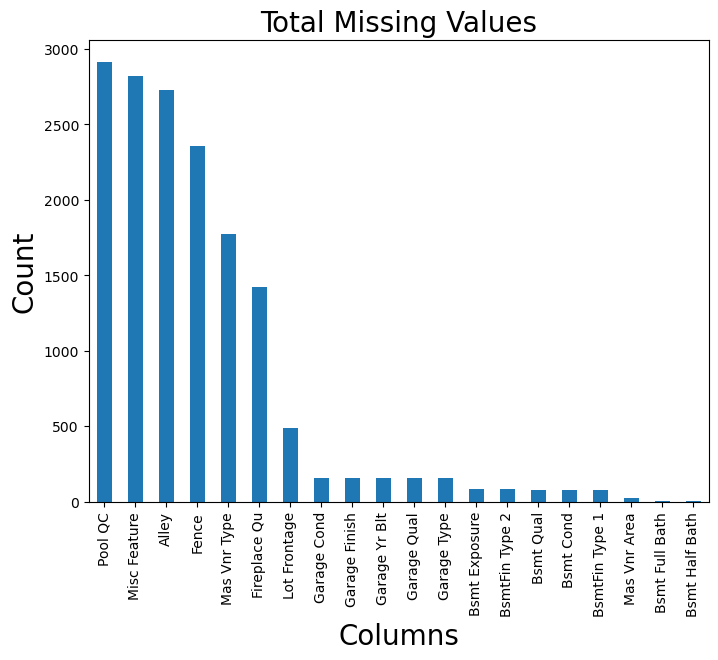

In [9]:
total = h.isnull().sum().sort_values(ascending=False)
total_select = total.head(20)
total_select.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

In [10]:
#Dropping columns with high number of nulls
h = h.drop(columns=['Pool QC', 'Misc Feature', 'Fence','Mas Vnr Type','Fireplace Qu','Alley'])  
h

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,...,0,0,120,0,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,...,0,0,0,0,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,244000
5,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,2926,923275080,80,RL,37.0,7937,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2006,WD,Normal,142500
2927,2927,923276100,20,RL,NaN,8885,Pave,IR1,Low,AllPub,...,0,0,0,0,0,6,2006,WD,Normal,131000
2928,2928,923400125,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,...,0,0,0,0,700,7,2006,WD,Normal,132000
2929,2929,924100070,20,RL,77.0,10010,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2006,WD,Normal,170000


Text(0.5, 1.0, 'Total Missing Values')

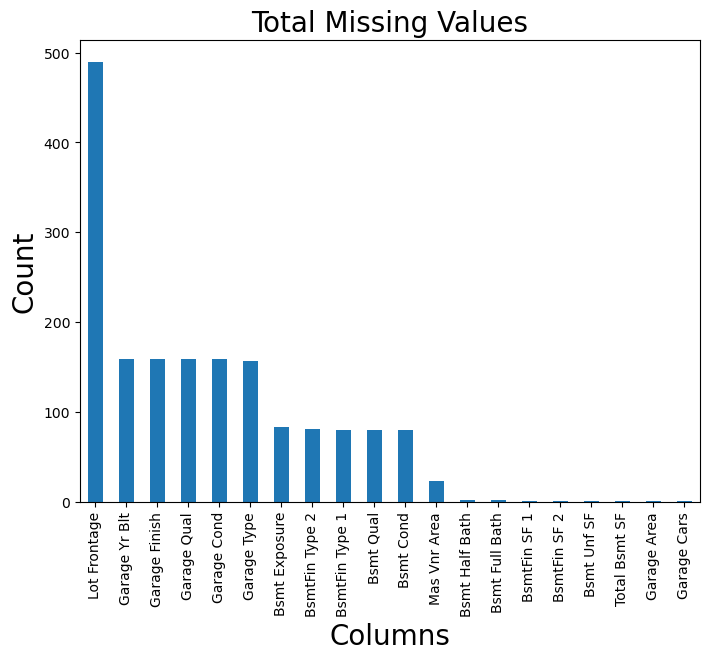

In [11]:
total = h.isnull().sum().sort_values(ascending=False)
total_select = total.head(20)
total_select.plot(kind="bar", figsize = (8,6), fontsize = 10)#pandas

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

In [12]:
h["Lot Frontage"].describe()


count    2440.000000
mean       69.224590
std        23.365335
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: Lot Frontage, dtype: float64

In [13]:
h["Lot Frontage"] = h["Lot Frontage"].fillna(h["Lot Frontage"].mean())


In [14]:
h = h.dropna(axis = 0)
h.shape

(2678, 76)

In [15]:
h.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,...,0,0,120,0,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,...,0,0,0,0,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,244000
5,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,Normal,189900


## **Identifying Important Features Using Correlation And Visualizing it**

In [17]:
hous_num = h.select_dtypes(include = ['float64', 'int64'])
hous_num

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,1,526301100,20,141.00000,31770,6,5,1960,1960,112.0,...,210,62,0,0,0,0,0,5,2010,215000
2,2,526350040,20,80.00000,11622,5,6,1961,1961,0.0,...,140,0,0,0,120,0,0,6,2010,105000
3,3,526351010,20,81.00000,14267,6,6,1958,1958,108.0,...,393,36,0,0,0,0,12500,6,2010,172000
4,4,526353030,20,93.00000,11160,7,5,1968,1968,0.0,...,0,0,0,0,0,0,0,4,2010,244000
5,5,527105010,60,74.00000,13830,5,5,1997,1998,0.0,...,212,34,0,0,0,0,0,3,2010,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2925,923251180,20,160.00000,20000,5,7,1960,1996,0.0,...,474,0,0,0,0,0,0,9,2006,131000
2926,2926,923275080,80,37.00000,7937,6,6,1984,1984,0.0,...,120,0,0,0,0,0,0,3,2006,142500
2927,2927,923276100,20,69.22459,8885,5,5,1983,1983,0.0,...,164,0,0,0,0,0,0,6,2006,131000
2929,2929,924100070,20,77.00000,10010,5,5,1974,1975,0.0,...,240,38,0,0,0,0,0,4,2006,170000


In [18]:
hous_num_corr = hous_num.corr()['SalePrice']
hous_num_corr

Order             -0.031744
PID               -0.221548
MS SubClass       -0.073121
Lot Frontage       0.346401
Lot Area           0.261842
Overall Qual       0.793249
Overall Cond      -0.145874
Year Built         0.545724
Year Remod/Add     0.525889
Mas Vnr Area       0.499652
BsmtFin SF 1       0.412925
BsmtFin SF 2      -0.013117
Bsmt Unf SF        0.162408
Total Bsmt SF      0.630305
1st Flr SF         0.630424
2nd Flr SF         0.265038
Low Qual Fin SF   -0.028493
Gr Liv Area        0.715867
Bsmt Full Bath     0.263045
Bsmt Half Bath    -0.046883
Full Bath          0.555861
Half Bath          0.269085
Bedroom AbvGr      0.149441
Kitchen AbvGr     -0.078667
TotRms AbvGrd      0.523363
Fireplaces         0.452517
Garage Yr Blt      0.526832
Garage Cars        0.652448
Garage Area        0.633467
Wood Deck SF       0.309485
Open Porch SF      0.317461
Enclosed Porch    -0.125185
3Ssn Porch         0.030700
Screen Porch       0.105232
Pool Area          0.074451
Misc Val          -0

In [19]:
top_features = hous_num_corr[abs(hous_num_corr) > 0.45].sort_values(ascending=False) #displays  correlation coefficient greater than 0.5
top_features
   

SalePrice         1.000000
Overall Qual      0.793249
Gr Liv Area       0.715867
Garage Cars       0.652448
Garage Area       0.633467
1st Flr SF        0.630424
Total Bsmt SF     0.630305
Full Bath         0.555861
Year Built        0.545724
Garage Yr Blt     0.526832
Year Remod/Add    0.525889
TotRms AbvGrd     0.523363
Mas Vnr Area      0.499652
Fireplaces        0.452517
Name: SalePrice, dtype: float64

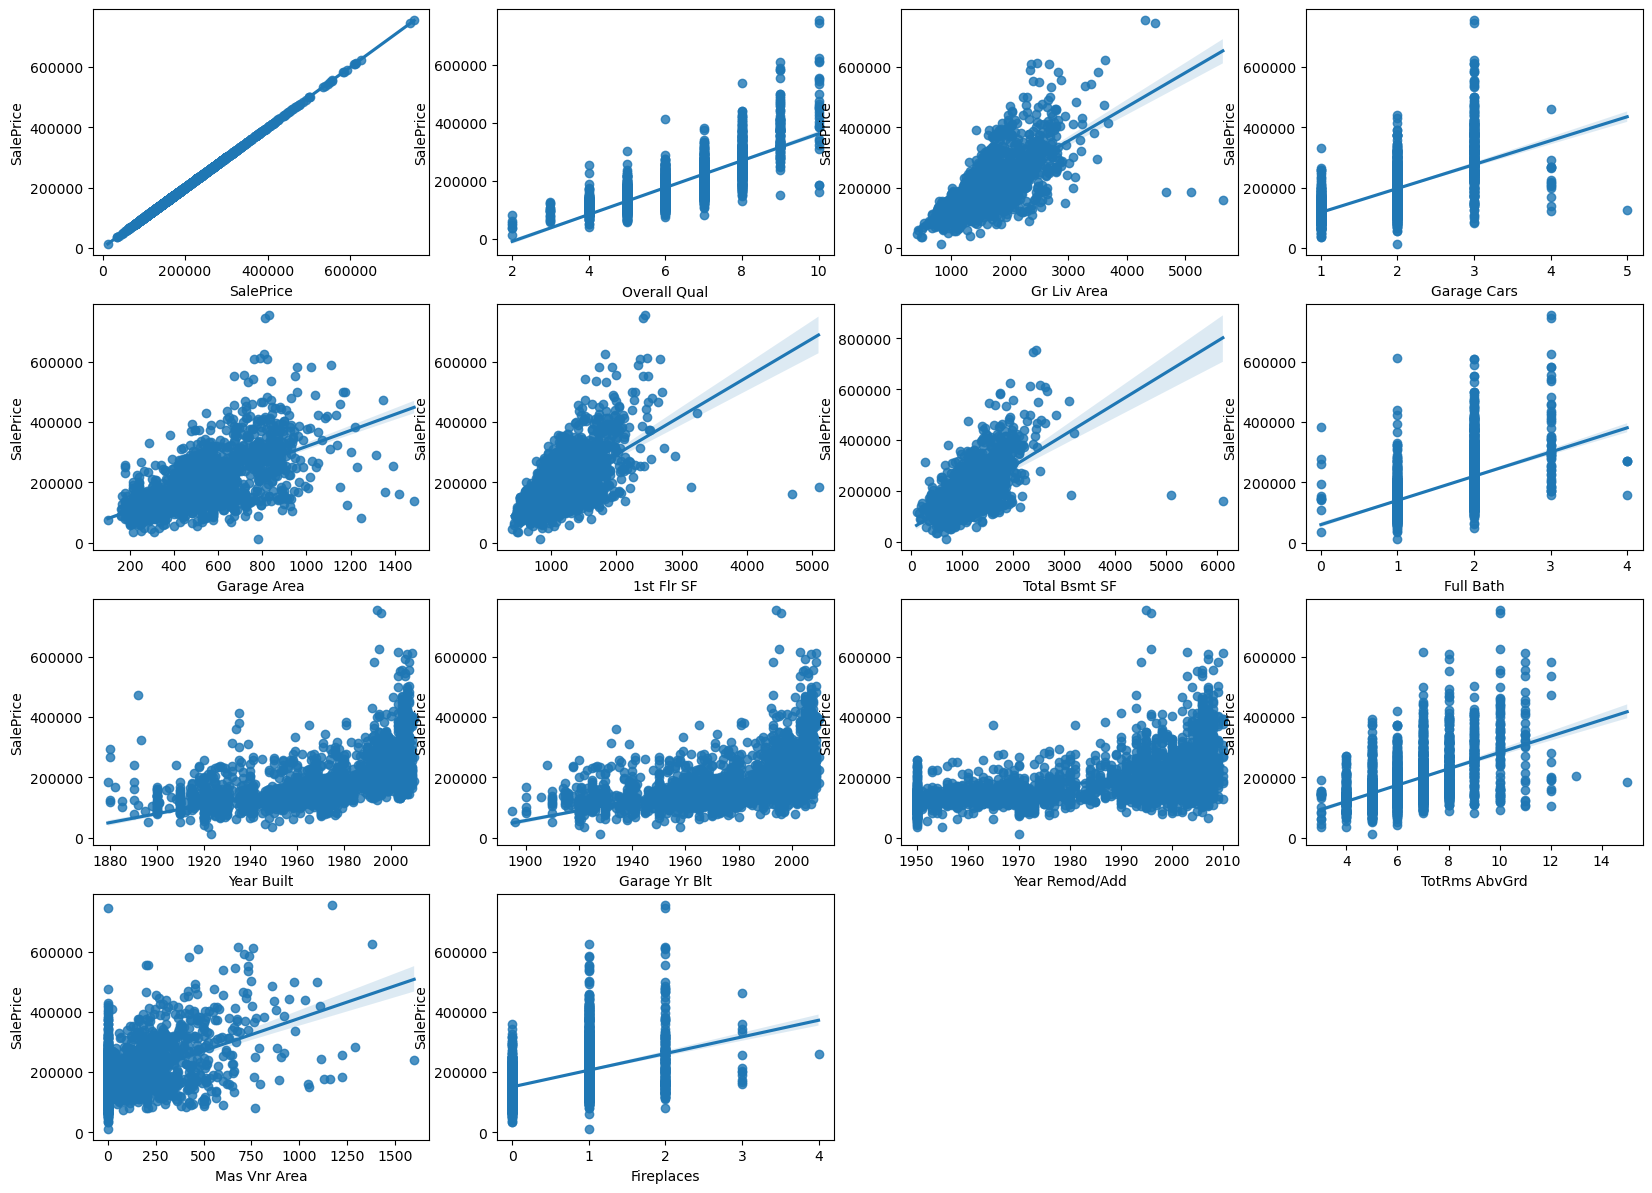

In [20]:
plt.figure(figsize = [20, 30])
# example of somewhat too-large bin size
for i in range(len(top_features.index)):
    plt.subplot(8, 4, 1+i)
    sns.regplot(data = hous_num, x =top_features.index[i], y = 'SalePrice');
    plt.xlabel(top_features.index[i]);
    plt.ylabel('SalePrice');

In [21]:
#removing less important(correlated) features
uncorr_data = hous_num_corr[abs(hous_num_corr) < 0.45].sort_values(ascending = False).index
uncorr_data

Index(['BsmtFin SF 1', 'Lot Frontage', 'Open Porch SF', 'Wood Deck SF',
       'Half Bath', '2nd Flr SF', 'Bsmt Full Bath', 'Lot Area', 'Bsmt Unf SF',
       'Bedroom AbvGr', 'Screen Porch', 'Pool Area', 'Mo Sold', '3Ssn Porch',
       'BsmtFin SF 2', 'Misc Val', 'Yr Sold', 'Low Qual Fin SF', 'Order',
       'Bsmt Half Bath', 'MS SubClass', 'Kitchen AbvGr', 'Enclosed Porch',
       'Overall Cond', 'PID'],
      dtype='object')

In [22]:
h = h.drop(uncorr_data , axis = 1)
h.shape

(2678, 51)

## **Cheaking For Outliers and Skewness**

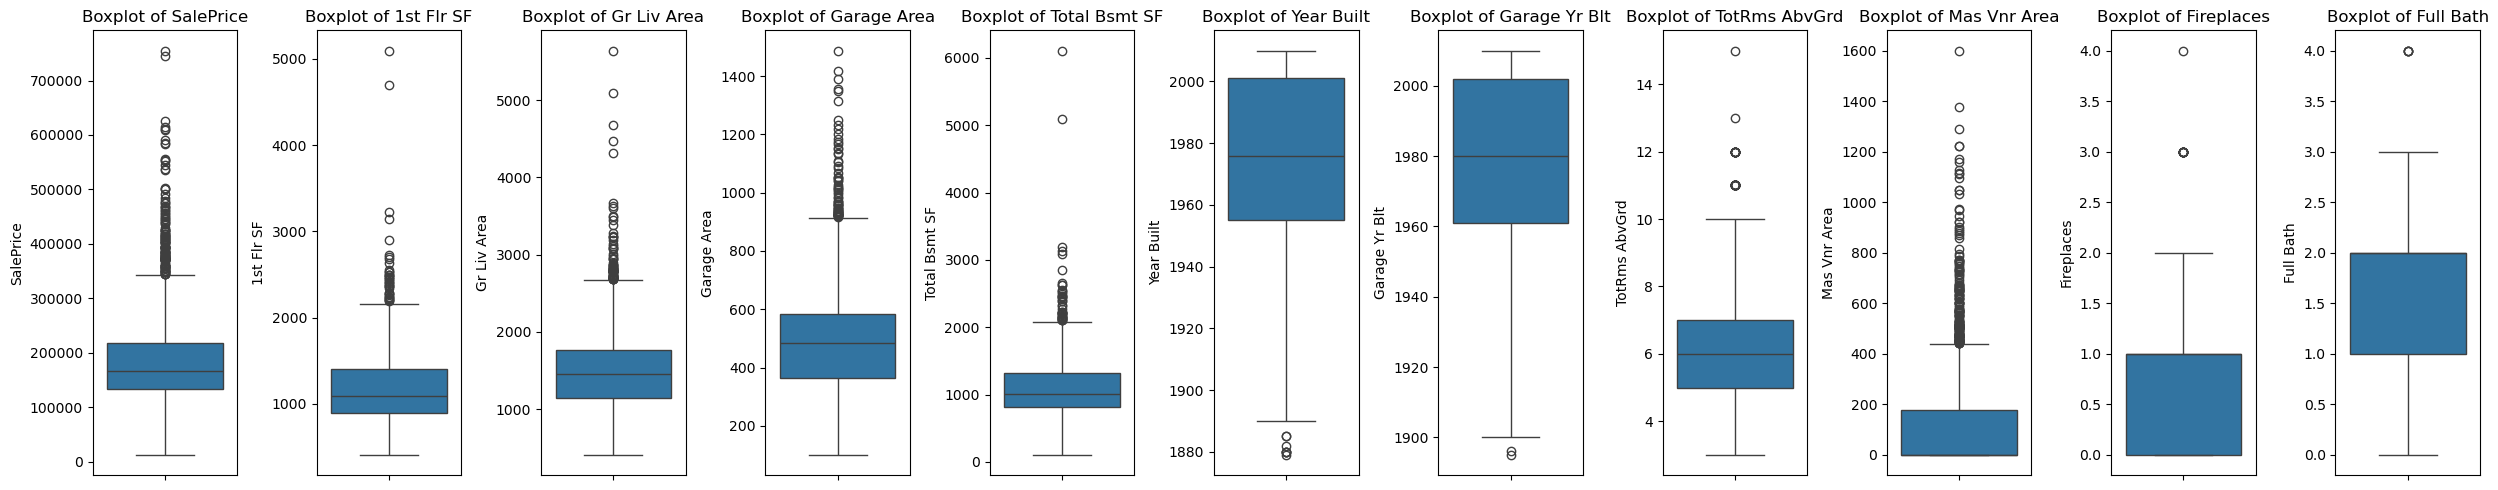

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns for which you want boxplots
columns = ['SalePrice', '1st Flr SF', 'Gr Liv Area','Garage Area','Total Bsmt SF','Year Built','Garage Yr Blt','TotRms AbvGrd','Mas Vnr Area','Fireplaces','Full Bath']

# Create subplots with one row and as many columns as there are in the list
fig, axes = plt.subplots(1, len(columns), figsize=(25, 5))

# Plot each column's boxplot in a separate subplot
for i, col in enumerate(columns):
    sns.boxplot(ax=axes[i], y=h[col])
    axes[i].set_title(f'Boxplot of {col}')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

In [25]:
columns = ['SalePrice', '1st Flr SF', 'Gr Liv Area','Garage Area','Total Bsmt SF','Year Built','Garage Yr Blt','TotRms AbvGrd','Mas Vnr Area','Fireplaces','Full Bath']  # Add the columns you want to process

# Loop through each column
for col in columns:
    percentile25 = h[col].quantile(0.25)
    percentile75 = h[col].quantile(0.75)
    
    # IQR calculated for the column
    iqr = percentile75 - percentile25
    
    # Calculating upper and lower limit
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    
    # Removing outliers by clipping the values
    h[col] = np.clip(h[col], lower_limit, upper_limit)

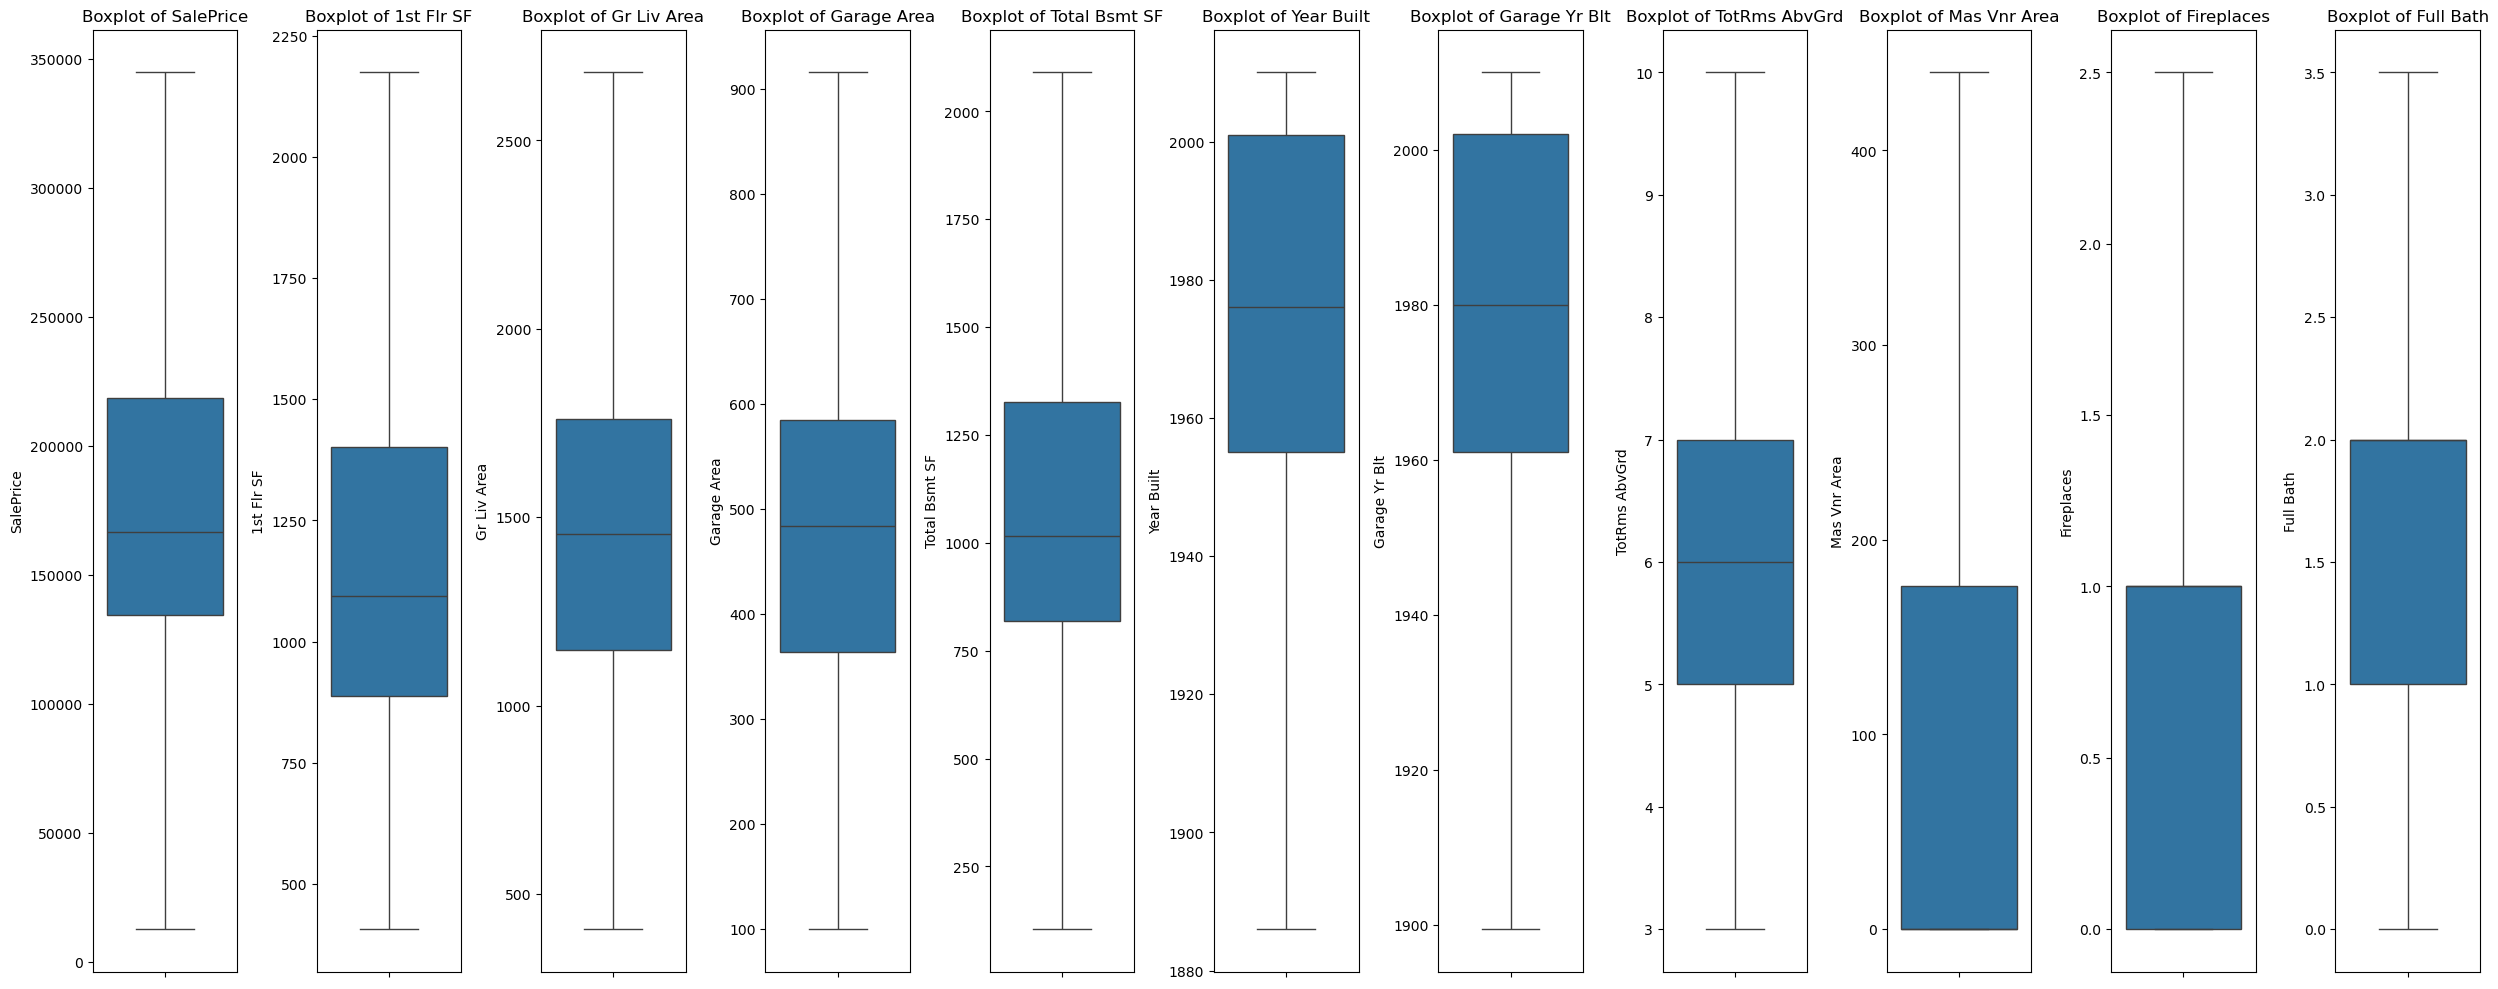

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns for which you want boxplots
columns = ['SalePrice', '1st Flr SF', 'Gr Liv Area','Garage Area','Total Bsmt SF','Year Built','Garage Yr Blt','TotRms AbvGrd','Mas Vnr Area','Fireplaces','Full Bath']

# Create subplots with one row and as many columns as there are in the list
fig, axes = plt.subplots(1, len(columns), figsize=(25, 10))

# Plot each column's boxplot in a separate subplot
for i, col in enumerate(columns):
    sns.boxplot(ax=axes[i], y=h[col])
    axes[i].set_title(f'Boxplot of {col}')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

In [27]:
hous_num = h.select_dtypes(include = ['float64', 'int64'])
hous_num

,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,SalePrice
0,6,1960,1960,112.0,1080.00,1656.0,1656.0,1.0,7,2.0,1960.0,2.0,528.0,215000.0
2,5,1961,1961,0.0,882.00,896.0,896.0,1.0,5,0.0,1961.0,1.0,730.0,105000.0
3,6,1958,1958,108.0,1329.00,1329.0,1329.0,1.0,6,0.0,1958.0,1.0,312.0,172000.0
4,7,1968,1968,0.0,2090.25,2110.0,2110.0,2.0,8,2.0,1968.0,2.0,522.0,244000.0
5,5,1997,1998,0.0,928.00,928.0,1629.0,2.0,6,1.0,1997.0,2.0,482.0,189900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,5,1960,1996,0.0,1224.00,1224.0,1224.0,1.0,7,1.0,1960.0,2.0,576.0,131000.0
2926,6,1984,1984,0.0,1003.00,1003.0,1003.0,1.0,6,0.0,1984.0,2.0,588.0,142500.0
2927,5,1983,1983,0.0,864.00,902.0,902.0,1.0,5,0.0,1983.0,2.0,484.0,131000.0
2929,5,1974,1975,0.0,1389.00,1389.0,1389.0,1.0,6,1.0,1975.0,2.0,418.0,170000.0


In [28]:
hous_num.skew()

Overall Qual      0.302792
Year Built       -0.651502
Year Remod/Add   -0.506796
Mas Vnr Area      1.287035
Total Bsmt SF     0.571439
1st Flr SF        0.636784
Gr Liv Area       0.643273
Full Bath         0.067251
TotRms AbvGrd     0.459525
Fireplaces        0.549651
Garage Yr Blt    -0.680228
Garage Cars       0.292984
Garage Area       0.488796
SalePrice         0.854727
dtype: float64

## **Scaling the Data and Using one hot encoding to Prepare the data for Machine Learning**

In [30]:
from sklearn.preprocessing import StandardScaler
h[hous_num.columns]=StandardScaler().fit_transform(h[hous_num.columns])
h

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,...,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition,SalePrice
0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,-0.722454,Fin,0.201305,0.172523,TA,TA,P,WD,Normal,0.480771
2,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,-0.682728,Unf,-1.330216,1.300697,TA,TA,Y,WD,Normal,-1.153832
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,-0.801906,Unf,-1.330216,-1.033841,TA,TA,Y,WD,Normal,-0.158210
4,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,-0.404647,Fin,0.201305,0.139013,TA,TA,Y,WD,Normal,0.911712
5,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,0.747405,Fin,0.201305,-0.084388,TA,TA,Y,WD,Normal,0.107784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,-0.722454,Unf,0.201305,0.440604,TA,TA,Y,WD,Abnorml,-0.767472
2926,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,...,0.230968,Unf,0.201305,0.507624,TA,TA,Y,WD,Normal,-0.596581
2927,RL,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,...,0.191242,Unf,0.201305,-0.073218,TA,TA,Y,WD,Normal,-0.767472
2929,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,...,-0.126565,RFn,0.201305,-0.441829,TA,TA,Y,WD,Normal,-0.187931


In [31]:
h = pd.get_dummies(h , dtype='int')

In [32]:
h.head(10)

,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,TotRms AbvGrd,Fireplaces,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,-0.157874,-0.442031,-1.221606,0.112011,-0.010639,1.344703,0.319749,-1.050955,0.384892,2.135219,...,0,0,0,1,0,0,0,0,1,0
2,-0.897014,-0.408120,-1.172792,-0.681172,-0.538329,-0.736953,-1.314814,-1.050955,-0.977620,-0.985598,...,0,0,0,1,0,0,0,0,1,0
3,-0.157874,-0.509855,-1.319234,0.083683,0.652970,0.449043,-0.383543,-1.050955,-0.296364,-0.985598,...,0,0,0,1,0,0,0,0,1,0
4,0.581265,-0.170737,-0.831095,-0.681172,2.681776,2.588219,1.296186,0.778991,1.066147,2.135219,...,0,0,0,1,0,0,0,0,1,0
5,-0.897014,0.812706,0.633324,-0.681172,-0.415734,-0.649304,0.261679,0.778991,-0.296364,0.574811,...,0,0,0,1,0,0,0,0,1,0
6,-0.157874,0.846618,0.633324,-0.539532,-0.421065,-0.654782,0.207911,0.778991,0.384892,0.574811,...,0,0,0,1,0,0,0,0,1,0
7,1.320404,0.948353,0.779765,-0.681172,0.676956,0.473694,-0.364186,0.778991,-0.296364,-0.985598,...,0,0,0,1,0,0,0,0,1,0
8,1.320404,0.643147,0.340440,-0.681172,0.522380,0.314831,-0.488929,0.778991,-0.977620,-0.985598,...,0,0,0,1,0,0,0,0,1,0
9,1.320404,0.744882,0.535696,-0.681172,1.361886,1.235142,0.233720,0.778991,-0.977620,0.574811,...,0,0,0,1,0,0,0,0,1,0
10,0.581265,0.880530,0.682138,-0.681172,-0.239838,-0.375402,0.638059,0.778991,0.384892,0.574811,...,0,0,0,1,0,0,0,0,1,0


## **Spliting the data into training and testing sets and using decision tree regressor to predict sale price**

In [34]:
y = h["SalePrice"]
X = h.drop(["SalePrice"] , axis = 1)

print(y)
X.head()

0       0.480771
2      -1.153832
3      -0.158210
4       0.911712
5       0.107784
          ...   
2925   -0.767472
2926   -0.596581
2927   -0.767472
2929   -0.187931
2930    0.079550
Name: SalePrice, Length: 2678, dtype: float64


,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,TotRms AbvGrd,Fireplaces,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,-0.157874,-0.442031,-1.221606,0.112011,-0.010639,1.344703,0.319749,-1.050955,0.384892,2.135219,...,0,0,0,1,0,0,0,0,1,0
2,-0.897014,-0.408120,-1.172792,-0.681172,-0.538329,-0.736953,-1.314814,-1.050955,-0.977620,-0.985598,...,0,0,0,1,0,0,0,0,1,0
3,-0.157874,-0.509855,-1.319234,0.083683,0.652970,0.449043,-0.383543,-1.050955,-0.296364,-0.985598,...,0,0,0,1,0,0,0,0,1,0
4,0.581265,-0.170737,-0.831095,-0.681172,2.681776,2.588219,1.296186,0.778991,1.066147,2.135219,...,0,0,0,1,0,0,0,0,1,0
5,-0.897014,0.812706,0.633324,-0.681172,-0.415734,-0.649304,0.261679,0.778991,-0.296364,0.574811,...,0,0,0,1,0,0,0,0,1,0


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Import the classifier from sklearn
from sklearn.tree import DecisionTreeRegressor

# TODO: Define the classifier, and fit it to the data
model = DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [36]:
from sklearn.metrics import r2_score

def performance(y_true , y_predict):
    score = r2_score(y_true , y_predict)
    
    return score

In [37]:
from sklearn.metrics import mean_squared_error, r2_score

# First, ensure you've already made predictions on the training data
y_train_pred = model.predict(X_train)

# Now, you can calculate the MSE and R2 score
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print('The training MSE is', mse_train)
print('The training R2 score is', r2_train)



The training MSE is 1.0654119143401896e-05
The training R2 score is 0.9999892745733003


In [38]:
model.fit(X_train, y_train)
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_score = performance(y_train , train_predict)
test_score = performance(y_test , test_predict)

print("The Train Score Is : " , train_score)
print("The Test Score Is : " , test_score)

The Train Score Is :  0.9999892745733003
The Test Score Is :  0.8343204986759599


In [39]:
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit


def fit_model(X , y):
    
    cv_sets = ShuffleSplit(n_splits = 5 , random_state = 0 , test_size = 0.2 , train_size = None)
    
    regressor = DecisionTreeRegressor(random_state=0)

    params = {"max_depth" : [11,12,13,14,15] , 'min_samples_leaf':[10,12,14,16],'min_samples_split':[2,4,6,8]}
    
    scoring = make_scorer(performance)
    
    grid = GridSearchCV(estimator=regressor, param_grid= params, scoring=scoring,cv=cv_sets)
    
    grid = grid.fit(X, y)
    
    return grid.best_estimator_

In [40]:
reg = fit_model(X_train , y_train)
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))
print("Parameter 'min_samples_leaf' is {} for the optimal model.".format(reg.get_params()['min_samples_leaf']))
print("Parameter 'min_samples_split' is {} for the optimal model.".format(reg.get_params()['min_samples_split']))

Parameter 'max_depth' is 11 for the optimal model.
Parameter 'min_samples_leaf' is 16 for the optimal model.
Parameter 'min_samples_split' is 2 for the optimal model.


In [41]:
reg.fit(X_train, y_train)
train_predict = reg.predict(X_train)
test_predict = reg.predict(X_test)

train_score = performance(y_train , train_predict)
test_score = performance(y_test , test_predict)

print("The Train Score Is : " , train_score)
print("The Test Score Is : " , test_score)

The Train Score Is :  0.8888583102944824
The Test Score Is :  0.8612861529741924
